<a href="https://www.kaggle.com/code/maziprimareza/ecommerce-sales-forecast-using-prophet?scriptVersionId=135216414" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
order_items = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
product = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
category_name_alias = pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


# Exploratory Data Analysis
Let's take a look at the data first!

### About Order Dataset
there's no further explanation on order status, but let's just define it something like...<br>
> success: shipped, delivered, invoiced <br>
> failed: canceled, unavailable <br>
> payment in progress: processing, approved, created

In [6]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders = orders[(orders['order_purchase_timestamp']>=pd.to_datetime('2017-01-01')) & (orders['order_purchase_timestamp']<=pd.to_datetime('2018-08-20'))]
orders = orders[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']]
orders = orders[orders['order_status'].isin(['shipped','delivered','invoiced'])]
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [7]:
orders['hour'] = orders['order_purchase_timestamp'].dt.hour
orders['dayofweek'] = orders['order_purchase_timestamp'].dt.dayofweek
orders['quarter'] = orders['order_purchase_timestamp'].dt.quarter
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['dayofyear'] = orders['order_purchase_timestamp'].dt.dayofyear
orders['dayofmonth'] = orders['order_purchase_timestamp'].dt.day
orders['date'] = orders['order_purchase_timestamp'].dt.date
orders['weekofyear'] = orders['order_purchase_timestamp'].dt.weekofyear

/tmp/ipykernel_21/1739279822.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  orders['weekofyear'] = orders['order_purchase_timestamp'].dt.weekofyear


<Axes: xlabel='date', ylabel='order_id'>

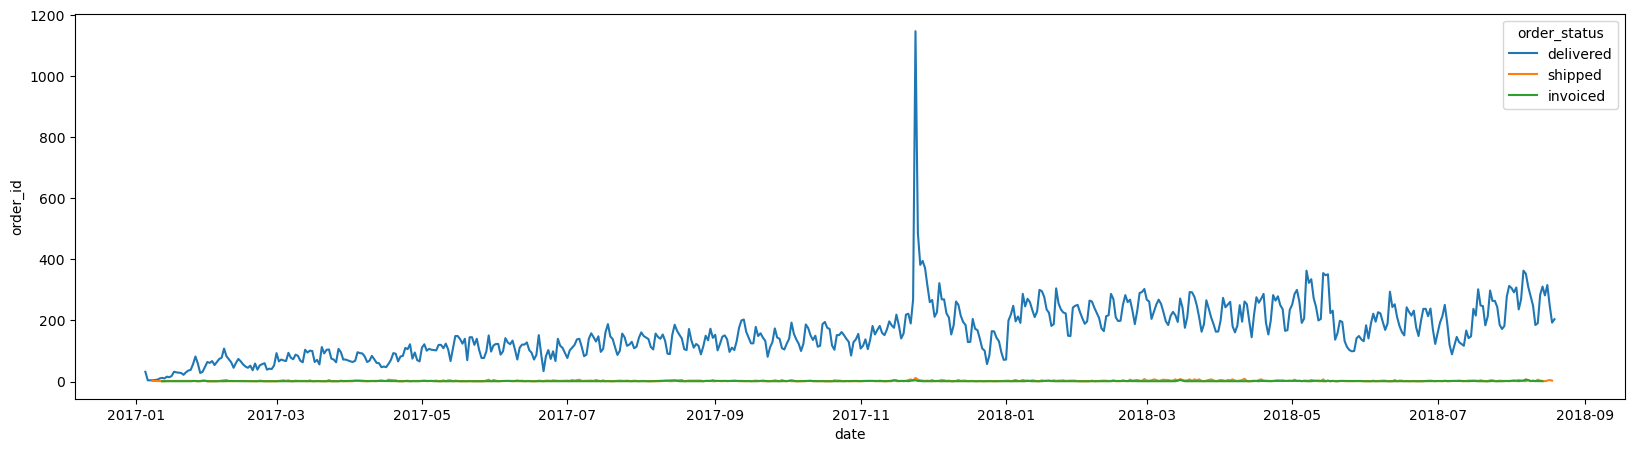

In [8]:
# a sudden increase is happened on 2017-11-24, let's see what is actually going on... 
# I am afraid that it is a noise and we should exclude data like this.
# we should exclude those dates on the beginning and the end, since it shows different pattern

daily_order = orders.groupby(['date', 'order_status'])['order_id'].nunique().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=daily_order, x='date', y='order_id', hue='order_status')

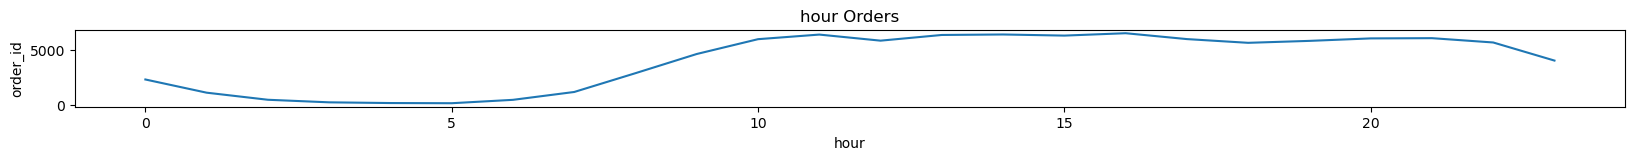

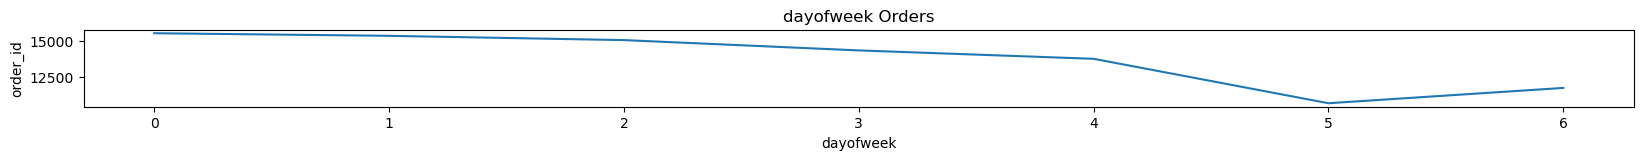

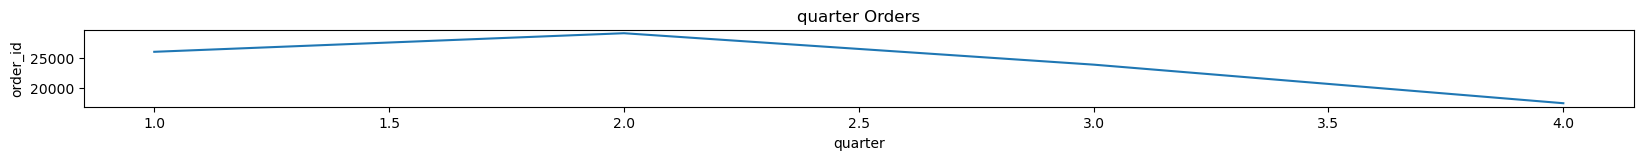

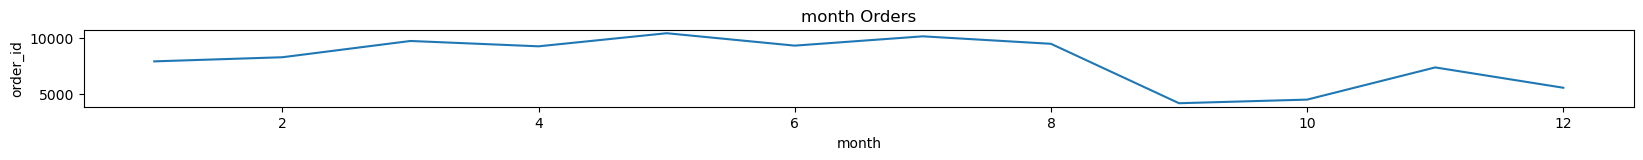

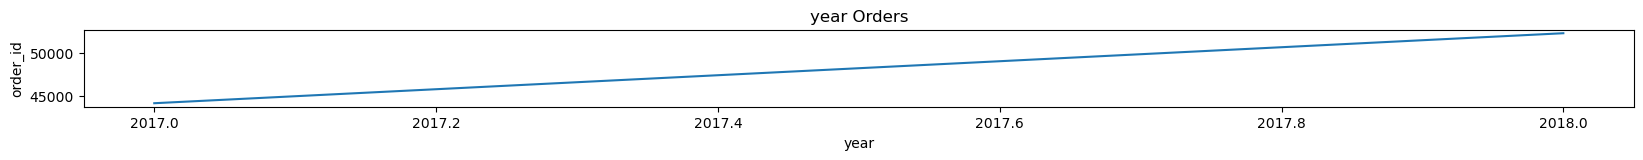

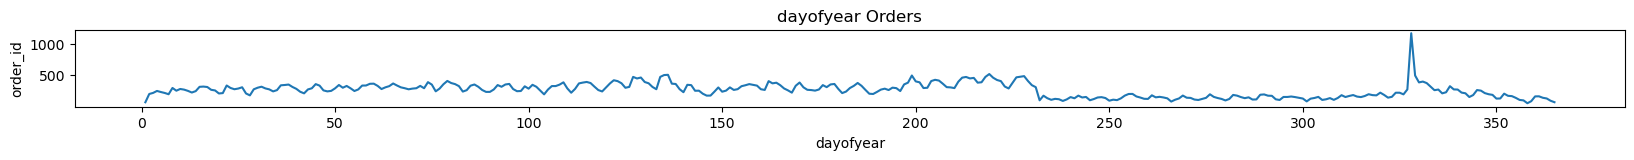

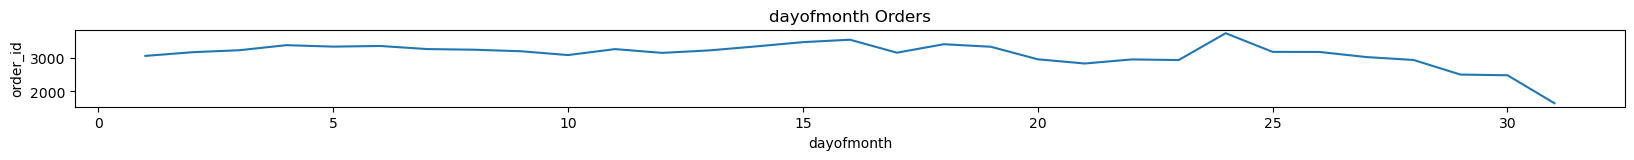

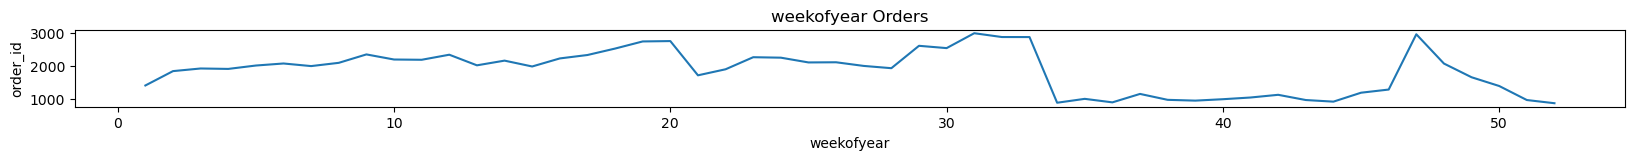

In [9]:
periods = ['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']

for period in periods:
    period_order = orders.groupby([period])['order_id'].nunique().reset_index()
    plt.figure(figsize=(20,1))
    sns.lineplot(data=period_order, x=period, y='order_id')
    plt.title(f"{period} Orders")
    plt.show

In [10]:
# I change the format to be something more familiar, we can see the product quantity in one order
order_items = order_items.groupby(['order_id', 'product_id']).agg(quantity=('product_id', 'count'), price=('price', 'mean')).reset_index()

In [11]:
product = product[['product_id', 'product_category_name']]
product = product.merge(category_name_alias, on='product_category_name', how='left')[['product_id', 'product_category_name_english']]
product.columns = ['product_id', 'product_category_name']

In [12]:
# merged dataset from order to product, so we have more information about the product

orders_items = order_items.merge(product, on='product_id', how='left')

In [13]:
# from this data, there's not much different from top categories based on number of products
# Olist is known for their bed_bath_table, beuaty, and sports products
orders_items.groupby(['product_category_name'])['quantity'].sum().sort_values(ascending=False).head(30)

product_category_name
bed_bath_table                     11115
health_beauty                       9670
sports_leisure                      8641
furniture_decor                     8334
computers_accessories               7827
housewares                          6964
watches_gifts                       5991
telephony                           4545
garden_tools                        4347
auto                                4235
toys                                4117
cool_stuff                          3796
perfumery                           3419
baby                                3065
electronics                         2767
stationery                          2517
fashion_bags_accessories            2031
pet_shop                            1947
office_furniture                    1691
consoles_games                      1137
luggage_accessories                 1092
construction_tools_construction      929
home_appliances                      771
musical_instruments                

In [14]:
orders_top_product_list = orders_items.groupby(['product_category_name'])['quantity'].sum().sort_values(ascending=False).head(10).index
orders_top_product = orders_items[orders_items['product_category_name'].isin(orders_top_product_list)]
transactions = orders.merge(orders_items, how='left')
transactions_top_product = transactions[transactions['product_category_name'].isin(orders_top_product_list)]

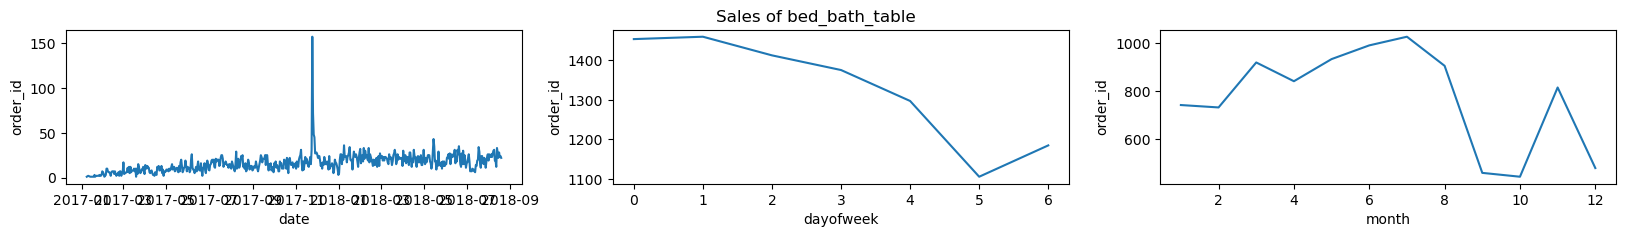

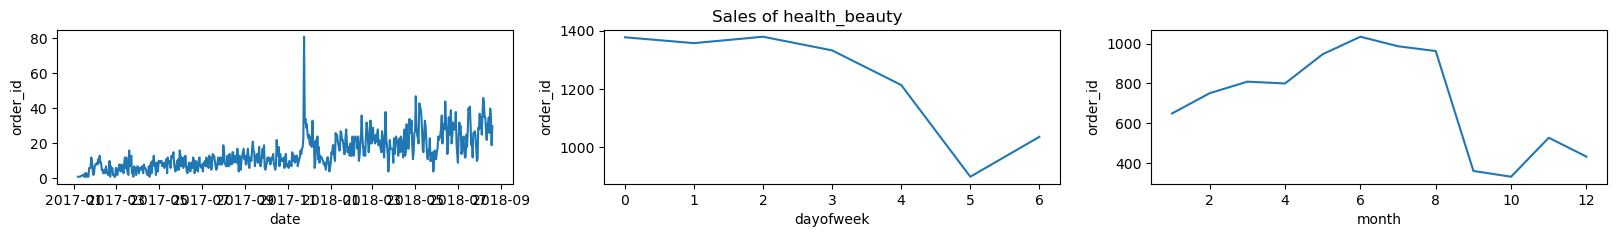

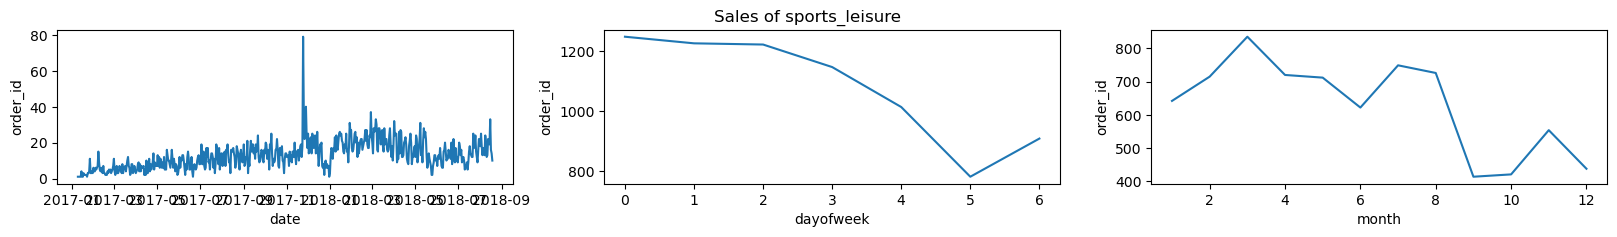

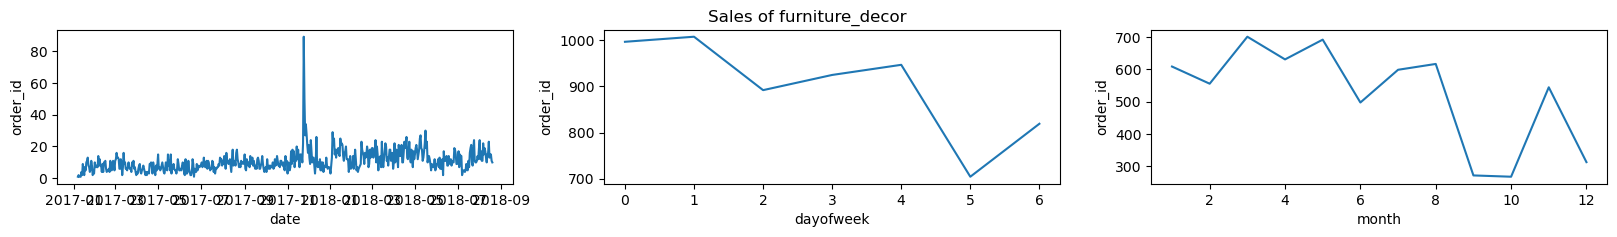

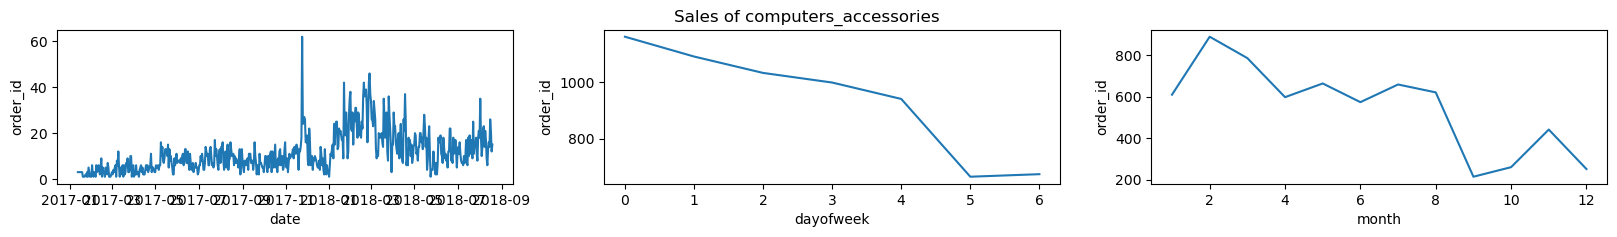

In [15]:
# Turns out that there is no different patterns between each category

daily_order = transactions_top_product.groupby(['date', 'product_category_name'])['order_id'].nunique().reset_index()
dayofweek_order = transactions_top_product.groupby(['dayofweek', 'product_category_name'])['order_id'].nunique().reset_index()
monthly_order = transactions_top_product.groupby(['month', 'product_category_name'])['order_id'].nunique().reset_index()
n = 5

for product in orders_top_product_list[:n]:
    fig, ax = plt.subplots(1, 3, figsize=(20, 2))
    sns.lineplot(data=daily_order[daily_order['product_category_name'].isin([product])], x='date', y='order_id', ax=ax[0])
    sns.lineplot(data=dayofweek_order[dayofweek_order['product_category_name'].isin([product])], x='dayofweek', y='order_id', ax=ax[1])
    sns.lineplot(data=monthly_order[monthly_order['product_category_name'].isin([product])], x='month', y='order_id', ax=ax[2])
    fig.suptitle(f"Sales of {product}")

In [16]:
black_friday = pd.to_datetime('2017-11-24')
#577 second big sales

In [17]:
dataset = transactions.groupby('date')['quantity'].sum().sort_values().reset_index()
dataset.loc[dataset['date']==black_friday, 'quantity'] = 430

/tmp/ipykernel_21/100124223.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  dataset.loc[dataset['date']==black_friday, 'quantity'] = 430


In [18]:
scaler = MinMaxScaler()
scaler.fit(dataset[['quantity']])

MinMaxScaler()

In [19]:
dataset['quantity'] = scaler.transform(dataset[['quantity']])

In [20]:
dataset = dataset.sort_values('date').reset_index().drop('index', axis=1)

# Forecast the data with Prophet

In [21]:
!pip install prophet

In [22]:
from prophet import Prophet

In [23]:
dates = transactions['date'].sort_values().unique()
num_dates = len(dates)
dates_train = dates[:int(0.8*num_dates)]
dates_test = dates[int(0.8*num_dates):]

In [24]:
train = dataset[dataset['date'].isin(dates_train)]
train.columns = ['ds', 'y']
train.sort_values('ds', inplace=True)

/tmp/ipykernel_21/3900069630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.sort_values('ds', inplace=True)


In [25]:
test = dataset[dataset['date'].isin(dates_test)]
test.columns = ['ds', 'y']
test.sort_values('ds', inplace=True)

/tmp/ipykernel_21/2242207259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_values('ds', inplace=True)


In [26]:
m = Prophet()
m.fit(train)
future = pd.DataFrame(dates_test, columns=['ds'])
forecast = m.predict(future)
forecast_today = m.predict(train)

07:20:20 - cmdstanpy - INFO - Chain [1] start processing
07:20:20 - cmdstanpy - INFO - Chain [1] done processing


# train dataset evaluation
the MSE is equal to 4K becasue of the outlier on black friday... we clearly have to work on it somehow

In [27]:
train['ds'] = pd.to_datetime(train['ds'])
train['dayofweek'] = train['ds'].dt.dayofweek
train['quarter'] = train['ds'].dt.quarter
train['month'] = train['ds'].dt.month
train['dayofmonth'] = train['ds'].dt.day
train['weekofyear'] = train['ds'].dt.weekofyear

/tmp/ipykernel_21/747160085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ds'] = pd.to_datetime(train['ds'])
/tmp/ipykernel_21/747160085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['dayofweek'] = train['ds'].dt.dayofweek
/tmp/ipykernel_21/747160085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [28]:
train['yhat'] = forecast_today['yhat']

/tmp/ipykernel_21/597386491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['yhat'] = forecast_today['yhat']


In [29]:
train[['y', 'yhat']] = scaler.inverse_transform(train[['y', 'yhat']])

/tmp/ipykernel_21/3789235146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['y', 'yhat']] = scaler.inverse_transform(train[['y', 'yhat']])


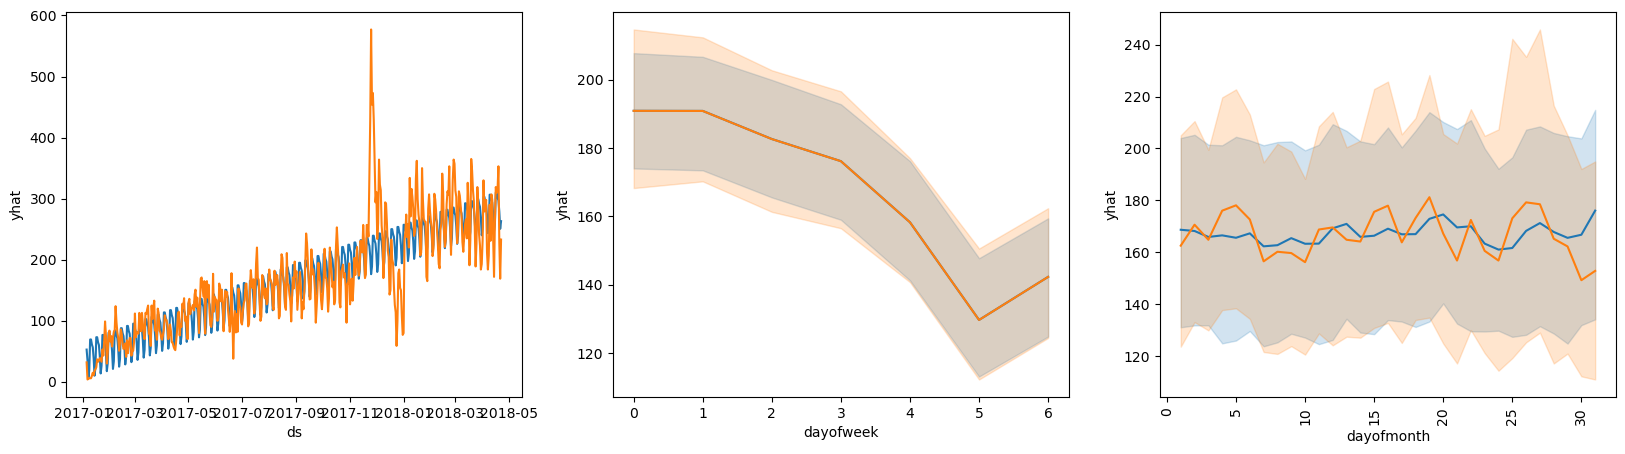

In [30]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.lineplot(data = train[['ds', 'yhat']], x='ds', y='yhat', ax=ax[0])
sns.lineplot(data = train[['ds', 'y']], x='ds', y='y', ax=ax[0])

sns.lineplot(data = train[['dayofweek', 'yhat']], x='dayofweek', y='yhat', ax=ax[1])
sns.lineplot(data = train[['dayofweek', 'y']], x='dayofweek', y='y', ax=ax[1])

sns.lineplot(data = train[['dayofmonth', 'yhat']], x='dayofmonth', y='yhat', ax=ax[2])
sns.lineplot(data = train[['dayofmonth', 'y']], x='dayofmonth', y='y', ax=ax[2])
plt.xticks(rotation = 90)
plt.show()

In [31]:
train['substract-squared'] = np.square(train['y'] - train['yhat'])

/tmp/ipykernel_21/3886500930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['substract-squared'] = np.square(train['y'] - train['yhat'])


In [32]:
train['substract-squared'].describe()

count       473.000000
mean       2144.707422
std        9239.914424
min           0.000038
25%          89.102008
50%         438.454752
75%        1287.417788
max      160493.373346
Name: substract-squared, dtype: float64

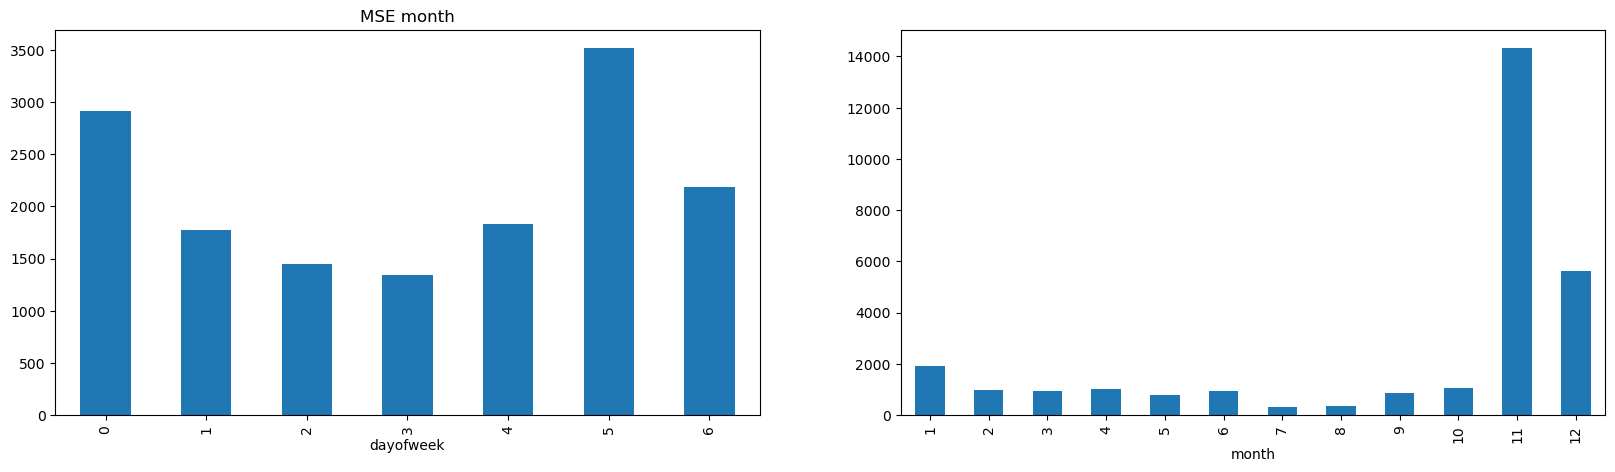

In [33]:
# from the figure, we know that the prophet can't really forecast the sudden spike on black friday and it's expected

fig, ax = plt.subplots(1,2,figsize=(20,5))
train.groupby('dayofweek')['substract-squared'].mean().plot(kind='bar', ax=ax[0])
train.groupby('month')['substract-squared'].mean().plot(kind='bar', ax=ax[1])
ax[0].set_title('MSE dayofweek')
ax[0].set_title('MSE month')
plt.show()

# test evaluation

In [34]:
test['ds'] = pd.to_datetime(test['ds'])
test['dayofweek'] = test['ds'].dt.dayofweek
test['quarter'] = test['ds'].dt.quarter
test['month'] = test['ds'].dt.month
test['dayofmonth'] = test['ds'].dt.day
test['weekofyear'] = test['ds'].dt.weekofyear

/tmp/ipykernel_21/1663498290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ds'] = pd.to_datetime(test['ds'])
/tmp/ipykernel_21/1663498290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['dayofweek'] = test['ds'].dt.dayofweek
/tmp/ipykernel_21/1663498290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [35]:
forecast.index = test.index
test['yhat'] = forecast['yhat']
test[['y', 'yhat']] = scaler.inverse_transform(test[['y', 'yhat']])
test['substract-squared'] = np.square(test['y'] - test['yhat'])

/tmp/ipykernel_21/2441891744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['yhat'] = forecast['yhat']
/tmp/ipykernel_21/2441891744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['y', 'yhat']] = scaler.inverse_transform(test[['y', 'yhat']])
/tmp/ipykernel_21/2441891744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [36]:
test['substract-squared'].describe()

count      119.000000
mean      9135.320786
std      10498.123833
min          0.021406
25%       1619.338231
50%       5872.670928
75%      11670.640967
max      46331.821602
Name: substract-squared, dtype: float64

In [37]:
test

,ds,y,dayofweek,quarter,month,dayofmonth,weekofyear,yhat,substract-squared
473,2018-04-23,329.0,0,2,4,23,17,313.555634,238.528447
474,2018-04-24,310.0,1,2,4,24,17,313.506779,12.297497
475,2018-04-25,320.0,2,2,4,25,17,305.263543,217.163151
476,2018-04-26,292.0,3,2,4,26,17,300.605792,74.059659
477,2018-04-27,284.0,4,2,4,27,17,282.702650,1.683118
...,...,...,...,...,...,...,...,...,...
587,2018-08-15,315.0,2,3,8,15,33,361.470797,2159.534970
588,2018-08-16,351.0,3,3,8,16,33,356.813046,33.791500
589,2018-08-17,288.0,4,3,8,17,33,338.909903,2591.818243
590,2018-08-18,206.0,5,3,8,18,33,310.314605,10881.536748


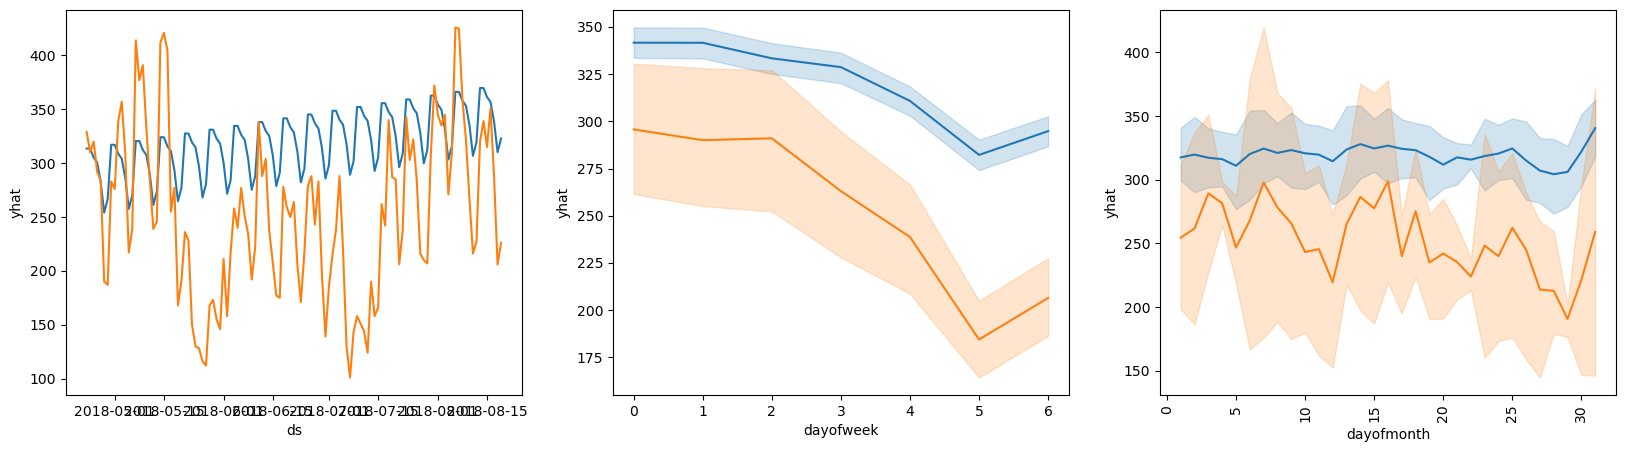

In [38]:
# I think the prediction is overfit to the train dataset, it can't really show how then trend in test dataset

fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.lineplot(data = test[['ds', 'yhat']], x='ds', y='yhat', ax=ax[0])
sns.lineplot(data = test[['ds', 'y']], x='ds', y='y', ax=ax[0])

sns.lineplot(data = test[['dayofweek', 'yhat']], x='dayofweek', y='yhat', ax=ax[1])
sns.lineplot(data = test[['dayofweek', 'y']], x='dayofweek', y='y', ax=ax[1])

sns.lineplot(data = test[['dayofmonth', 'yhat']], x='dayofmonth', y='yhat', ax=ax[2])
sns.lineplot(data = test[['dayofmonth', 'y']], x='dayofmonth', y='y', ax=ax[2])
plt.xticks(rotation = 90)
plt.show()

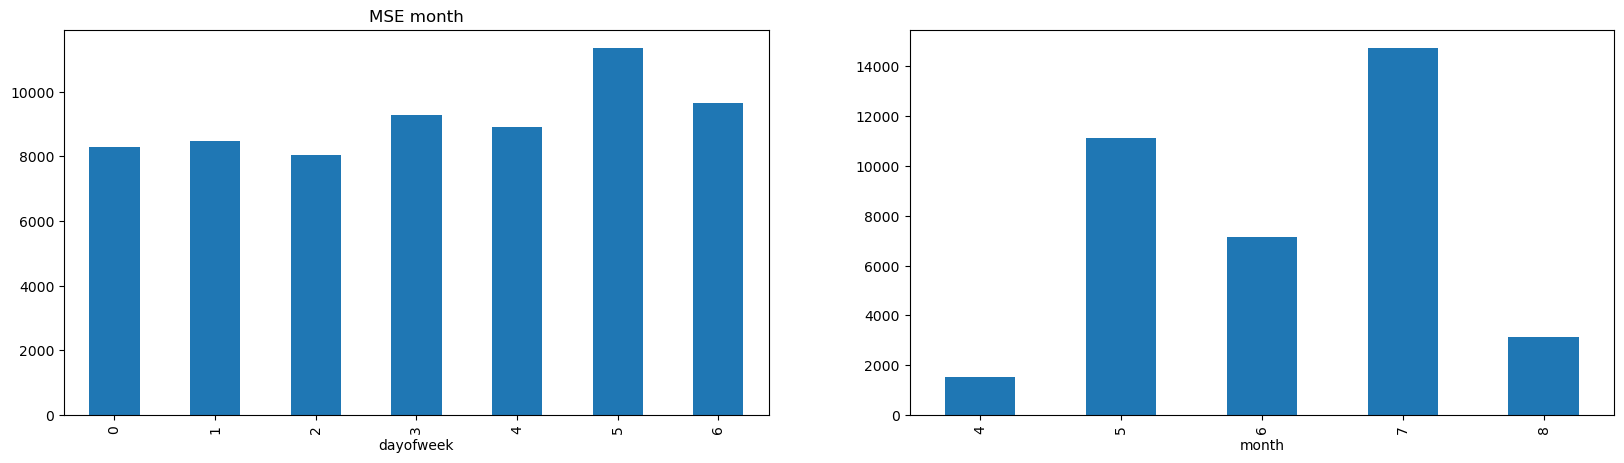

In [39]:
# from the figure, we know that the prophet can't really forecast the sudden spike on black friday and it's expected

fig, ax = plt.subplots(1,2,figsize=(20,5))
test.groupby('dayofweek')['substract-squared'].mean().plot(kind='bar', ax=ax[0])
test.groupby('month')['substract-squared'].mean().plot(kind='bar', ax=ax[1])
ax[0].set_title('MSE dayofweek')
ax[0].set_title('MSE month')
plt.show()

# Summary

1. There is a spike on black friday that the model can't handle and it is expected
2. The model is overfit to train dataset and can't really tell what's actually happened in test dataset

# Improvement
1. Trying to hyperparameter tuning https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning
2. Remove outlier data
3. Giving context to the holiday season